# Dimensionality Reduction
There can be many reasons why we may want to reduce the number of features in our data.  Computation time may be a a concern for particularly large datasets, or we may want to use an algorithm that requires uncorrelated inputs.  Whatever our reasons may be, there are a few tools that we have at our disposal which we will explore in this exercise.

## Principal Component Analysis
PCA is likely to end up being your main workhorse when you want to reduce the number of features or uncorrelate your inputs.  Recall that PCA works by finding a set of principal axis in your data that which maximizes the variance, and as a bonus, you get a reduced set of uncorrelated features which can be used to express your data.  Most software packages perform PCA via a Singular Value Decomposition given by $$\mathbf {M} =\mathbf {U} {\boldsymbol {\Sigma }}\mathbf {V} ^{*}$$ Where $\mathbf{V} ^{*}$ is a matrix containing the principal components.

You may notice that PCA finds a linear mapping from the full data space, to the reduced component space.  But what if we wanted to use a non-linear mapping?  To accomplish this, we can use a non-linear kernel in our PCA which is called Kernel PCA.

In this exercise you'll explore these concepts using both generated and real-world data.

1 - Generate a set of 300 noisy random data points along the line $y = x + \epsilon$.  Compute the mean, variance, and correlation of your data and plot.

In [1]:
import numpy as np
# in solution:
# rng = np.random.RandomState(0)
# x = -1 + rng.rand(300)*2
# eps = rng.randn(300)*0.1
# y = x + eps
# 300 equally separate x values
x = np.linspace(-3, 3, 300)
# noisy y values
y = x + np.random.randn(300)
# stacking values
X = np.vstack([x, y]).T
# printing statistics
print(X.mean(axis=0))
print(X.var(axis=0))
print(np.corrcoef(X.T))

[ 0.          0.04179037]
[ 3.02006689  3.70917218]
[[ 1.          0.86988089]
 [ 0.86988089  1.        ]]


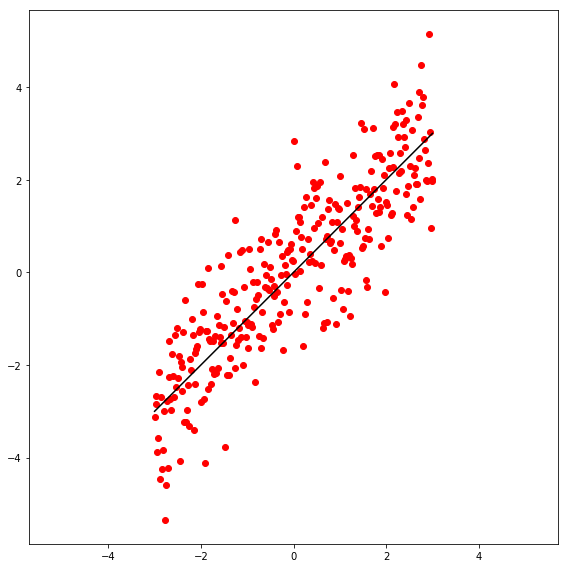

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1)
fig.set_size_inches((8, 8))
# scatter of points
ax.plot(X[:, 0], X[:, 1], 'ro')
# plotting y=x
ax.plot(x, x, 'k-')
ax.axis('equal')
# ax.set_aspect('equal', 'box')
fig.tight_layout();

2 - Compute the PCA of the randomly generated data above, printing the explained variance of each component.  Project onto the new axis, plot, and print the variance, mean, and correlation matrix of the new data.  Comment on your results.

In [3]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)

[ 0.93567312  0.06432688]


The two variables are highly correlated, so almost all the variance is explained by the first principal component.

In [4]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
# Printing statistics of transformed data
print(X_pca.mean(axis=0))
print(X_pca.var(axis=0))
print(np.corrcoef(X_pca.T))

[  1.89478063e-16]
[ 6.2963681]
1.0


The total variance from above is 6.7 and here we have 6.3 of variance, which is approximately the 93.5% of explained variance from this component.

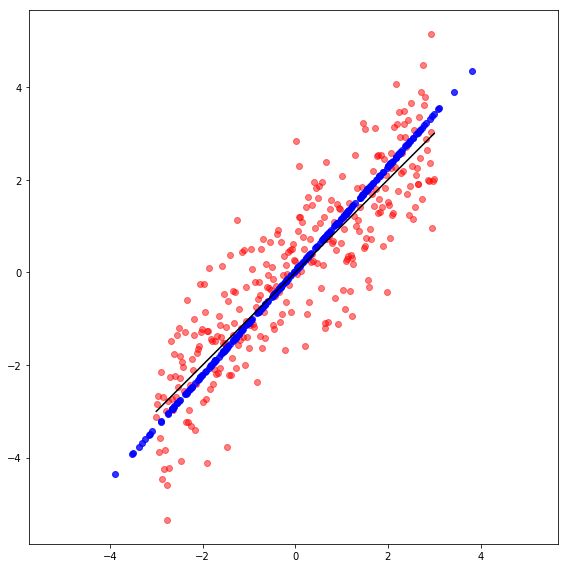

In [5]:
X_inv = pca.inverse_transform(X_pca)

fig, ax = plt.subplots(1)
fig.set_size_inches((8, 8))
# scatter of actual points
ax.plot(X[:, 0], X[:, 1], 'ro', alpha=0.5)
# scatter of projected points
ax.plot(X_inv[:, 0], X_inv[:, 1], 'bo', alpha=0.8)
# plotting y=x
ax.plot(x, x, 'k-')
ax.axis('equal')
# ax.set_aspect('equal', 'box')
fig.tight_layout();

As we can see the line is very close to $y=x$.

3 - Now add a third column to your randomly generated data that is just a copy of one of already existing columns, perform a PCA, and comment on your results.

In [6]:
X3 = np.hstack([X, X[:, 1].reshape(-1, 1)])

pca = PCA()
pca.fit(X3)
pca.explained_variance_ratio_

array([  9.47182725e-01,   5.28172749e-02,   9.46844473e-33])

As expected the new column explained variance is 0: the new data doesn't add anything to the old data.

4 - Head over to the [Machine Learning Repository](https://archive.ics.uci.edu/ml) and download the [Communities and Crime](https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime) data set, put it into a dataframe, dropping the `state`, `county`, `community`, `communityname` columns, and break down into training and test sets. `ViolentCrimesPerPop` will be the column we want to predict later on.

In [7]:
import pandas as pd

cols = ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack',
        'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up',
        'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
        'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap',
        'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore',
        'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf',
        'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
        'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
        'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5',
        'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam',
        'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup',
        'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
        'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart',
        'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc',
        'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState',
        'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
        'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
        'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor',
        'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 'PctUsePubTrans',
        'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn',
        'PolicBudgPerPop', 'ViolentCrimesPerPop']

communities = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data',
                          header=None,
                          na_values='?')
# setting columns names
communities.columns = cols
# dropping state, county, community and communityname
communities.drop(['state', 'county', 'community', 'communityname'], axis=1, inplace=True)

In [8]:
communities.shape

(1994, 124)

In [9]:
communities.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


We have some missing values, I'll drop the columns with 1675 nas and impute the median for the one with only a missing value.

In the solution he uses the mean for *all* the columns, which seems to me not a good choice given the number of nas in some of them...

In [10]:
communities.isnull().sum().sort_values(ascending=False)

LemasSwFTFieldPerPop    1675
LemasTotalReq           1675
PolicReqPerOffic        1675
PolicPerPop             1675
RacialMatchCommPol      1675
PctPolicWhite           1675
PctPolicBlack           1675
PctPolicHisp            1675
PctPolicAsian           1675
PctPolicMinor           1675
OfficAssgnDrugUnits     1675
NumKindsDrugsSeiz       1675
PolicAveOTWorked        1675
LemasSwFTFieldOps       1675
LemasSwFTPerPop         1675
LemasSwornFT            1675
PolicCars               1675
PolicOperBudg           1675
LemasPctPolicOnPatr     1675
LemasGangUnitDeploy     1675
PolicBudgPerPop         1675
LemasTotReqPerPop       1675
OtherPerCap                1
AsianPerCap                0
PctKids2Par                0
HispPerCap                 0
NumUnderPov                0
PctPopUnderPov             0
PctLess9thGrade            0
PctNotHSGrad               0
                        ... 
LandArea                   0
PopDens                    0
PctUsePubTrans             0
LemasPctOfficD

In [11]:
communities = communities.dropna(thresh=1000, axis=1)

In [12]:
from sklearn.preprocessing import Imputer

imp = Imputer(strategy='median')
communities = imp.fit_transform(communities)

In [142]:
from sklearn.model_selection import train_test_split
# from the solution: scale the data!
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
communities_scaled = sc.fit_transform(communities)

Xtrain, Xtest, ytrain, ytest = train_test_split(communities_scaled[:, :-1], communities_scaled[:, -1], test_size=0.2, random_state=0)

5 - Perform a PCA on the data and make a plot of the the explained variance versus number of principal components.  What seems like a good choice of components?

In [143]:
# in the solution he uses only the training data!
pca = PCA()
pca.fit(communities[:, :-1])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

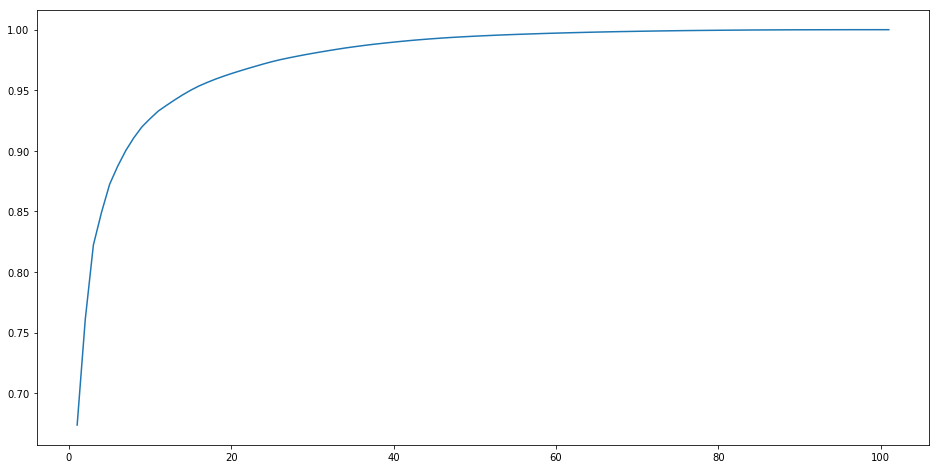

In [144]:
plt.figure(figsize=(16, 8))
plt.plot(np.arange(1, communities.shape[1]), np.cumsum(pca.explained_variance_ratio_));

It looks like something in-between 15-20 features is a good choice, since we reach 95% of explained variance and after that the growth is quite slow.

6 - Using the number of components you found above, fit two different machine learning algorithms to the data, computing training/test error.  Comment on your results.

In the solutions he has the data scaled, all the features imputed and so he chooses 40 components.

The models chosen are linear regression and SVM.

In [145]:
# using 20 components
pca = PCA(n_components=20)
pca.fit(communities_scaled[:, :-1])
Xtrainpca = pca.transform(Xtrain)
Xtestpca = pca.transform(Xtest)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [146]:
# Linear regression
lr = LinearRegression()
lr.fit(Xtrainpca, ytrain)
print('Training MSE, R^2": {:.5f}, {:.5f}'.format(mean_squared_error(lr.predict(Xtrainpca), ytrain), lr.score(Xtrainpca, ytrain)))
print('Test MSE, R^2: {:.5f}, {:.5f}'.format(mean_squared_error(lr.predict(Xtestpca), ytest), lr.score(Xtestpca, ytest)))

Training MSE, R^2": 0.34289, 0.64868
Test MSE, R^2: 0.40395, 0.63135


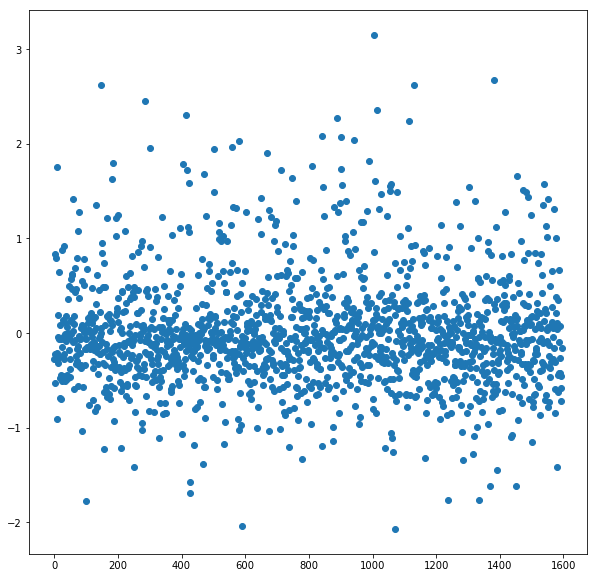

In [150]:
# from solution: residual plot!
residuals = ytrain - lr.predict(Xtrainpca)
plt.figure(figsize=(10, 10))
plt.scatter(np.arange(len(residuals)), residuals)

In [151]:
# Decision tree
tree = DecisionTreeRegressor()
tree.fit(Xtrainpca, ytrain)
print('Training MSE, R^2": {:.5f}, {:.5f}'.format(mean_squared_error(tree.predict(Xtrainpca), ytrain), tree.score(Xtrainpca, ytrain)))
print('Test MSE, R^2: {:.5f}, {:.5f}'.format(mean_squared_error(tree.predict(Xtestpca), ytest), tree.score(Xtestpca, ytest)))

Training MSE, R^2": 0.00000, 1.00000
Test MSE, R^2: 0.94261, 0.13978


As I expected linear regression is outperforming the decision tree, because I haven't used all of the features and this might be more beneficial to the former algorithm.

Also, decision tree is suffering from bad generalization.

7 - Now fit the same models used in part (6), but this time using the full data set.  Comment on your results.

In [152]:
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
print('Training MSE, R^2": {:.5f}, {:.5f}'.format(mean_squared_error(lr.predict(Xtrain), ytrain), lr.score(Xtrain, ytrain)))
print('Test MSE, R^2: {:.5f}, {:.5f}'.format(mean_squared_error(lr.predict(Xtest), ytest), lr.score(Xtest, ytest)))

Training MSE, R^2": 0.29492, 0.69782
Test MSE, R^2: 0.37378, 0.65889


In [153]:
tree = DecisionTreeRegressor()
tree.fit(Xtrain, ytrain)
print('Training MSE, R^2": {:.5f}, {:.5f}'.format(mean_squared_error(tree.predict(Xtrain), ytrain), tree.score(Xtrain, ytrain)))
print('Test MSE, R^2: {:.5f}, {:.5f}'.format(mean_squared_error(tree.predict(Xtest), ytest), tree.score(Xtest, ytest)))

Training MSE, R^2": 0.00000, 1.00000
Test MSE, R^2: 0.84585, 0.22808


Decision tree still generalizes bad, but the gain in performance by using all the features is greater than that of linear regression.

From solution: using PCA reduces the overfitting because I have less features!

8 - Classify the response into 3 categories, `High`, `Med`, and `Low`, use PCA to reduce the data to 2 dimensions, and then generate a plot to show the latent clusters in the data.

In [154]:
# using percentiles
perc = np.percentile(communities[:, -1], [33, 66, 100])
ycat = ['Low' if y < 0.09 else 'Med' if y < 0.25 else 'High' for y in communities[:, -1]]

In [156]:
pca = PCA(n_components=2)
comm_pca = pca.fit_transform(communities_scaled[:, :-1])

In [157]:
# creating a dataframe with PCs and the category
comm_pca = pd.DataFrame(comm_pca, columns=['PC1', 'PC2'])
comm_pca['cat'] = ycat
comm_pca.head()

,PC1,PC2,cat
0,-1.339120,-1.032291,Med
1,1.440056,0.506406,High
2,2.135575,-2.431458,High
3,-2.997983,1.964522,Med
4,-5.608219,-2.707333,Low


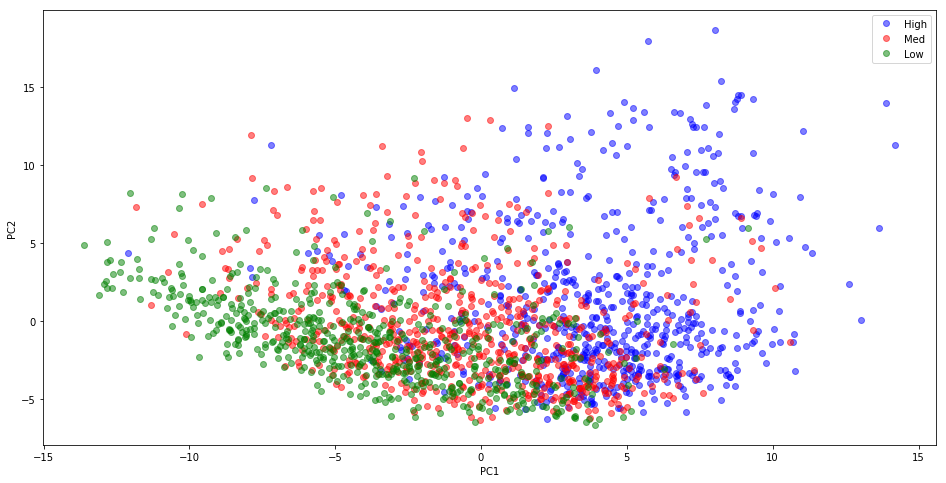

In [158]:
plt.figure(figsize=(16, 8))
plt.plot(comm_pca.loc[comm_pca.cat=='High', 'PC1'], comm_pca.loc[comm_pca.cat=='High', 'PC2'], 'bo', alpha=0.5, label='High')
plt.plot(comm_pca.loc[comm_pca.cat=='Med', 'PC1'], comm_pca.loc[comm_pca.cat=='Med', 'PC2'], 'ro', alpha=0.5, label='Med')
plt.plot(comm_pca.loc[comm_pca.cat=='Low', 'PC1'], comm_pca.loc[comm_pca.cat=='Low', 'PC2'], 'go', alpha=0.5, label='Low')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend();

# solution:
# plt.scatter(comm_pca.loc[:, 'PC1'], comm_pca.loc[:, 'PC2'], c=comm_pca.cat, edgecolors=None, alpha=0.5, cmap= plt.cm.get_cmap('spectral', 3))

This is very unusual I think: the first PC is almost discrete and all the differences between the various categories seems to lie on the second PC direction, with Low having largest values and High the smallest ones.

OK, this was because I didn't scale the data as in the solutions, now the plot is much better!

9 - Perform a KPCA, using `linear`, `rbf`, and `poly` kernels, on the data, using the same number of components as above, and fit the same machine learning algorithms and in part (6).  Comment on your results.

In [159]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=20)
# looping through the various kernels
for kernel in ['linear', 'rbf', 'poly']:
    print('Kernel = {}'.format(kernel))
    # setting params
    kpca.set_params(kernel=kernel)
    # fitting and transforming
    kpca.fit(communities[:, :-1])
    Xtrainpca = kpca.transform(Xtrain)
    Xtestpca = kpca.transform(Xtest)
    # linear regression and scoring
    lr = LinearRegression()
    lr.fit(Xtrainpca, ytrain)
    print('Training MSE, R^2": {:.5f}, {:.5f}'.format(mean_squared_error(lr.predict(Xtrainpca), ytrain), lr.score(Xtrainpca, ytrain)))
    print('Test MSE, R^2: {:.5f}, {:.5f}'.format(mean_squared_error(lr.predict(Xtestpca), ytest), lr.score(Xtestpca, ytest)))
    # decision tree and scoring
    tree = DecisionTreeRegressor()
    tree.fit(Xtrainpca, ytrain)
    print('Training MSE, R^2": {:.5f}, {:.5f}'.format(mean_squared_error(tree.predict(Xtrainpca), ytrain), tree.score(Xtrainpca, ytrain)))
    print('Test MSE, R^2: {:.5f}, {:.5f}'.format(mean_squared_error(tree.predict(Xtestpca), ytest), tree.score(Xtestpca, ytest)))
    print('-----------------------------------------------------------------')

Kernel = linear
Training MSE, R^2": 0.34034, 0.65128
Test MSE, R^2: 0.40214, 0.63300
Training MSE, R^2": 0.00000, 1.00000
Test MSE, R^2: 0.88223, 0.19488
-----------------------------------------------------------------
Kernel = rbf
Training MSE, R^2": 0.48142, 0.50674
Test MSE, R^2: 0.57531, 0.47497
Training MSE, R^2": 0.00000, 1.00000
Test MSE, R^2: 0.96362, 0.12060
-----------------------------------------------------------------
Kernel = poly
Training MSE, R^2": 0.35368, 0.63761
Test MSE, R^2: 0.42220, 0.61470
Training MSE, R^2": 0.00000, 1.00000
Test MSE, R^2: 0.81544, 0.25583
-----------------------------------------------------------------


Linear and rbf kernels are almost the same for linear regression, while poly kernel is slightly worst.

Decision tree works better with the linear and poly kernel instead, while always overfitting and being the worst model overall between the two.

*After scaling the data*: linear regression improves with poly kernel but gets worse with rbf, decision tree stays almost the same.

## Linear Discriminant Analysis
Recall that Linear Discriminant Analysis is a classification algorithm which essentially finds a hyperplane which separates the data, thereby providing classification.  As it turns out, this same technique can also be used for dimensionality reduction in a similar manner as PCA.  In this exercise, you'll use the `Digits` dataset in `sklearn`, comparing your results with PCA.

1 - Load the `Digits` data from `sklearn`, perform a LDA variable reduction, projecting the data onto 2 dimensions, and generate a plot, showing the latent clusters in the data.  Comment on your results.

In [160]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

In [33]:
X.shape

(1797, 64)

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
Xlda = lda.fit_transform(X, y)

C:\Users\alessandro.diantonio\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


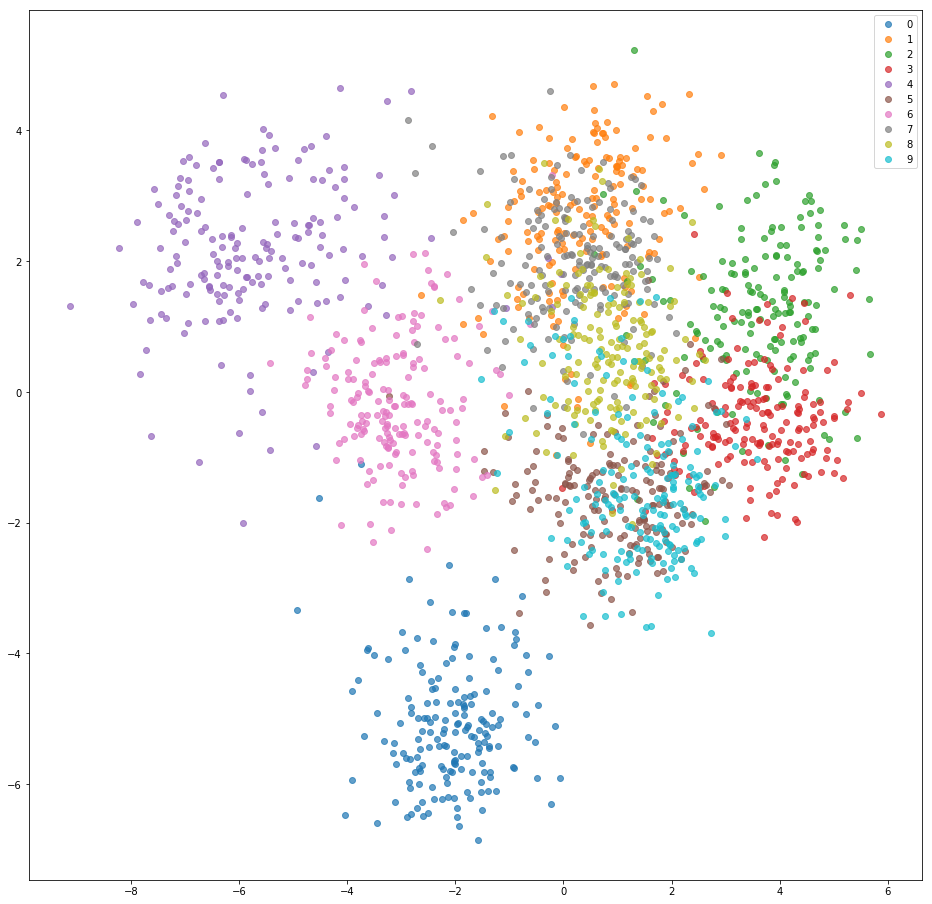

In [29]:
plt.figure(figsize=(16, 16))
# looping through the digits and scattering
for i in np.arange(0, 10):
    plt.plot(Xlda[y==i, 0], Xlda[y==i, 1], 'o', label=str(i), alpha=0.7)

plt.legend();

There are some digits clearly distinct from the others (0, 4, 6) while others form clusters (such as 2 and 3). The digits in the center of the plot instead are overlapping a lot.

2 - Determine a reasonable number of components for dimensionality reduction on the data.  Comment on your results.

In [30]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

C:\Users\alessandro.diantonio\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

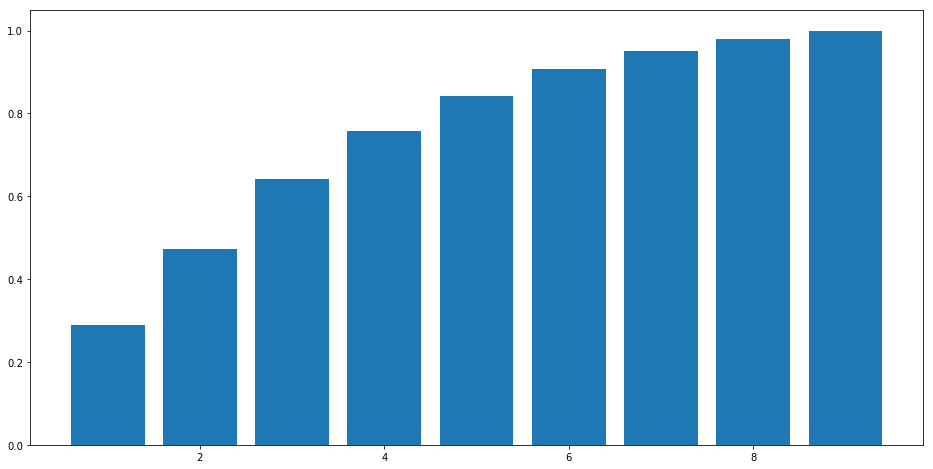

In [32]:
# using explained variance ratio, which I assume is the same as the "explained discriminancy" used in the labs
plt.figure(figsize=(16, 8))
plt.bar(np.arange(1, len(lda.explained_variance_ratio_)+1), np.cumsum(lda.explained_variance_ratio_));

6 components seems a good choice. (Also, I noticed that we have 9 components, which is 1 less than the number of classes as it said in the labs!)

3 - Split your data into training and test sets, perform feature reduction using the number of features determined in part (2), and fit two machine learning algorithms of your choice to the data, computing the training and test accuracies.  Comment on your results.

In [161]:
lda = LinearDiscriminantAnalysis(n_components=6)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

Xtrain_lda = lda.fit_transform(Xtrain, ytrain)
Xtest_lda = lda.transform(Xtest)

C:\Users\alessandro.diantonio\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\alessandro.diantonio\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [162]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(Xtrain_lda, ytrain)
print('Training accuracy: {:.5f}'.format(lr.score(Xtrain_lda, ytrain)))
print('Test accuracy: {:.5f}'.format(lr.score(Xtest_lda, ytest)))

Training accuracy: 0.93807
Test accuracy: 0.89167


In [163]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain_lda, ytrain)
print('Training accuracy: {:.5f}'.format(knn.score(Xtrain_lda, ytrain)))
print('Test accuracy: {:.5f}'.format(knn.score(Xtest_lda, ytest)))

Training accuracy: 0.96868
Test accuracy: 0.92222


Both models are quite good!

4 - Perform part (3) again, but this time with the full data set and comment on your results.

In [39]:
lr.fit(Xtrain, ytrain)
print('Training accuracy: {:.5f}'.format(lr.score(Xtrain, ytrain)))
print('Test accuracy: {:.5f}'.format(lr.score(Xtest, ytest)))

Training accuracy: 0.99582
Test accuracy: 0.95000


In [40]:
knn.fit(Xtrain, ytrain)
print('Training accuracy: {:.5f}'.format(knn.score(Xtrain, ytrain)))
print('Test accuracy: {:.5f}'.format(knn.score(Xtest, ytest)))

Training accuracy: 0.99026
Test accuracy: 0.97500


Using the full dataset improves the performances for both models.

5 - Perform dimensionality reduction using PCA, and fit the same models you used in parts (3) and (4).  Comment on your results.

OK, in the solution he tries to find a good number of components, and it's 20:

In [164]:
pca = PCA(n_components=20)

Xtrain_pca = pca.fit_transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

In [165]:
lr.fit(Xtrain_pca, ytrain)
print('Training accuracy: {:.5f}'.format(lr.score(Xtrain_pca, ytrain)))
print('Test accuracy: {:.5f}'.format(lr.score(Xtest_pca, ytest)))

Training accuracy: 0.96521
Test accuracy: 0.95000


In [166]:
knn.fit(Xtrain_pca, ytrain)
print('Training accuracy: {:.5f}'.format(knn.score(Xtrain_pca, ytrain)))
print('Test accuracy: {:.5f}'.format(knn.score(Xtest_pca, ytest)))

Training accuracy: 0.99095
Test accuracy: 0.97222


Using PCA the performances are worst, especially for linear regression which goes from 89% to 82% test accuracy.

And using 20 and not 6 components we get a better result from both models.

6 - Perform dimensionality reduction using KPCA with `rbf` and `poly` kernels, the same number of components as above, and fit the same models you used in parts (3) and (4).  Comment on your results.

In [167]:
kpca = KernelPCA(n_components=20)
# loop through kernels
for kernel in ['rbf', 'poly']:
    print('Kernel = {}'.format(kernel))
    #set params
    kpca.set_params(kernel=kernel)
    kpca.fit(Xtrain)
    Xtrain_pca = kpca.transform(Xtrain)
    Xtest_pca = kpca.transform(Xtest)
    # linear regression and scoring
    lr.fit(Xtrain_pca, ytrain)
    print('Training accuracy: {:.5f}'.format(lr.score(Xtrain_pca, ytrain)))
    print('Test accuracy: {:.5f}'.format(lr.score(Xtest_pca, ytest)))
    # knn and scoring
    knn.fit(Xtrain_pca, ytrain)
    print('Training accuracy: {:.5f}'.format(knn.score(Xtrain_pca, ytrain)))
    print('Test accuracy: {:.5f}'.format(knn.score(Xtest_pca, ytest)))
    print('-----------------------------------------------------------------')

Kernel = rbf
Training accuracy: 0.27975
Test accuracy: 0.15833
Training accuracy: 0.64092
Test accuracy: 0.22778
-----------------------------------------------------------------
Kernel = poly
Training accuracy: 0.97495
Test accuracy: 0.95000
Training accuracy: 0.98539
Test accuracy: 0.97500
-----------------------------------------------------------------


Both models are very bad using the rbf kernel, while using a poly kernel they have good performances.

## Manifolds
With the exception of Kernel PCA, the techniques we have explored so far, utilize only linear mappings.  Another non-linear mapping are generically called Manifold Learning which are fairly advanced, graduate level, mathematical topics.  Luckily for us, there are a number of methods made available in `sklearn` which will we use in this exercise.

1 - Head over to the [Machine Learning Repository](https://archive.ics.uci.edu/ml) and download the [MADELON](https://archive.ics.uci.edu/ml/datasets/MADELON) training data and labels, put it into a dataframe, and break into training and test sets.

In [59]:
madelon = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.data', sep=' ', header=None)
madelon_labels = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.labels', header=None)

In [60]:
madelon.drop(500, axis=1, inplace=True)
madelon.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511


In [61]:
madelon_labels.head()

,0
0,-1
1,-1
2,-1
3,1
4,1


In [79]:
Xtrain, Xtest, ytrain, ytest = train_test_split(madelon, madelon_labels, test_size=0.2, random_state=0)

2 - Perform variable reduction, to two components, via Multidimensional Scaling, and plot the data to show the latent clusters.  Comment on your results.

In [64]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
madelon_mds = mds.fit_transform(madelon)

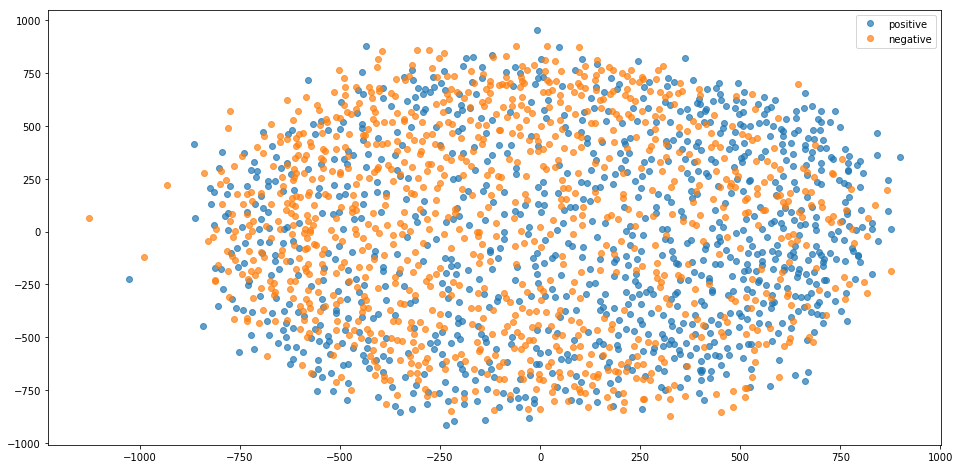

In [113]:
# in the solution it uses only the training set
plt.figure(figsize=(16, 8))
plt.plot(madelon_mds[(madelon_labels.values==1)[:, 0], 0], madelon_mds[(madelon_labels.values==1)[:, 0], 1], 'o', alpha=0.7, label='positive')
plt.plot(madelon_mds[(madelon_labels.values==-1)[:, 0], 0], madelon_mds[(madelon_labels.values==-1)[:, 0], 1], 'o', alpha=0.7, label='negative')
plt.legend();

The classes are overlapping all over the place!

3 - Perform variable reduction, to two components, via Isomap, and plot the data to show the latent clusters.  Comment on your results.

In [114]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
madelon_iso = iso.fit_transform(madelon)

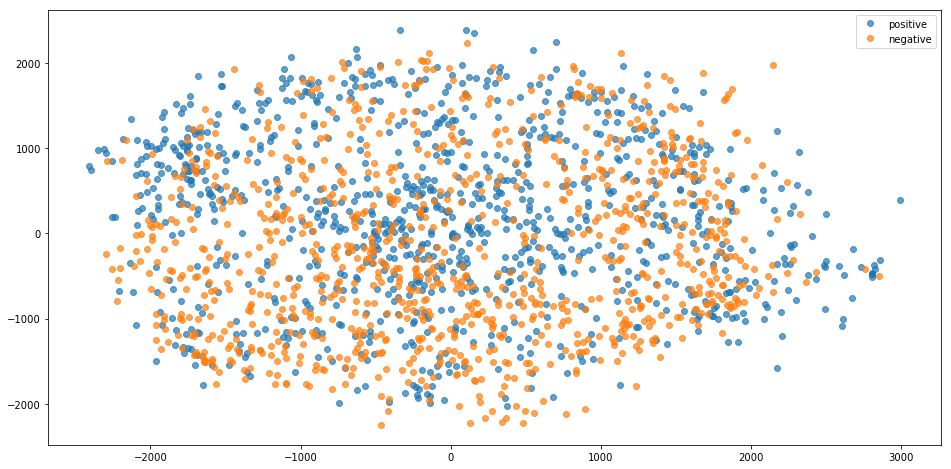

In [140]:
plt.figure(figsize=(16, 8))
plt.plot(madelon_iso[(madelon_labels.values==1)[:, 0], 0], madelon_iso[(madelon_labels.values==1)[:, 0], 1], 'o', alpha=0.7, label='positive')
plt.plot(madelon_iso[(madelon_labels.values==-1)[:, 0], 0], madelon_iso[(madelon_labels.values==-1)[:, 0], 1], 'o', alpha=0.7, label='negative')
plt.legend();

A bit better, positive values seems more concentrated on the superior part of the plot.

4 - Perform variable reduction, to two components, via Locally Linear Embedding, and plot the data to show the latent clusters.  Comment on your results.

In [116]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)
madelon_lle = lle.fit_transform(madelon)

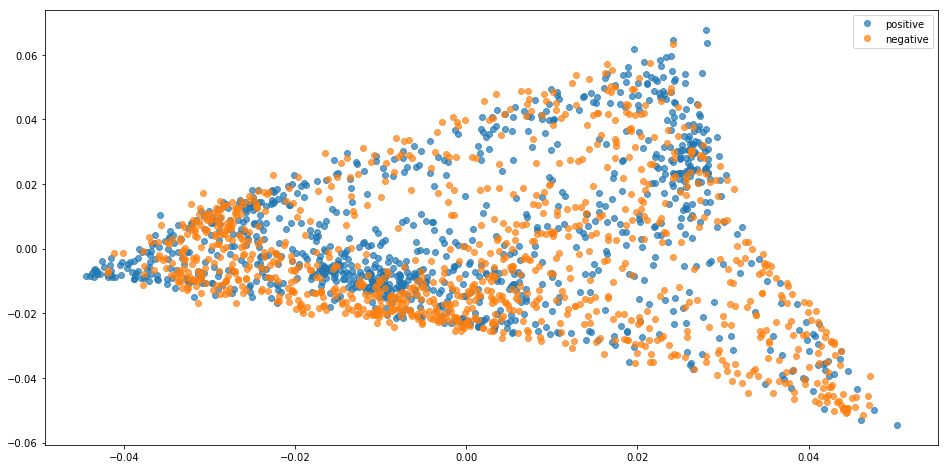

In [117]:
plt.figure(figsize=(16, 8))
plt.plot(madelon_lle[(madelon_labels.values==1)[:, 0], 0], madelon_lle[(madelon_labels.values==1)[:, 0], 1], 'o', alpha=0.7, label='positive')
plt.plot(madelon_lle[(madelon_labels.values==-1)[:, 0], 0], madelon_lle[(madelon_labels.values==-1)[:, 0], 1], 'o', alpha=0.7, label='negative')
plt.legend();

This is a very strange plot, the classes are a bit clustered in some places but then there are others (the left part of the plot) were they are still clustered but these clusters are overlapping with each other.

5 - Perform variable reduction, to two components, via TSNE, and plot the data to show the latent clusters.  Comment on your results.

In [118]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
madelon_tsne = tsne.fit_transform(madelon)

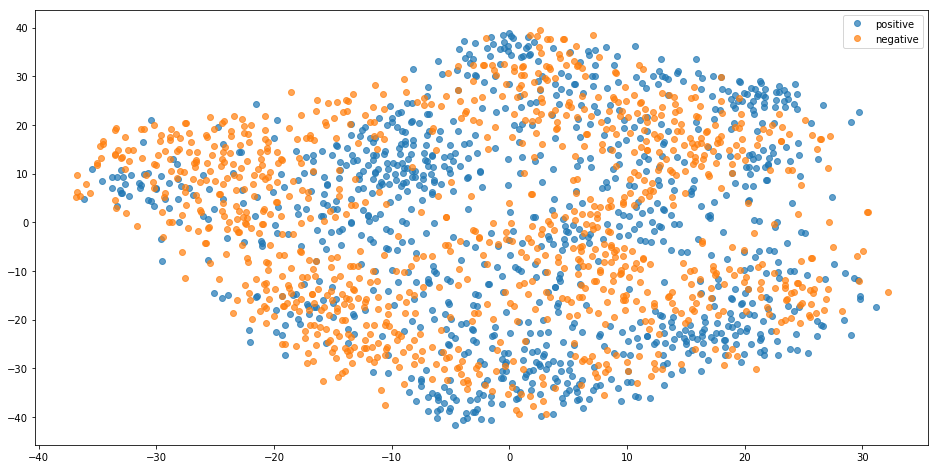

In [119]:
plt.figure(figsize=(16, 8))
plt.plot(madelon_tsne[(madelon_labels.values==1)[:, 0], 0], madelon_tsne[(madelon_labels.values==1)[:, 0], 1], 'o', alpha=0.7, label='positive')
plt.plot(madelon_tsne[(madelon_labels.values==-1)[:, 0], 0], madelon_tsne[(madelon_labels.values==-1)[:, 0], 1], 'o', alpha=0.7, label='negative')
plt.legend();

This doesn't seems very helpful either...

6 - Perform variable reduction, to two components, via PCA, and plot the data to show the latent clusters.  Comment on your results.

In [120]:
pca = PCA(n_components=2)
madelon_pca = pca.fit_transform(madelon)

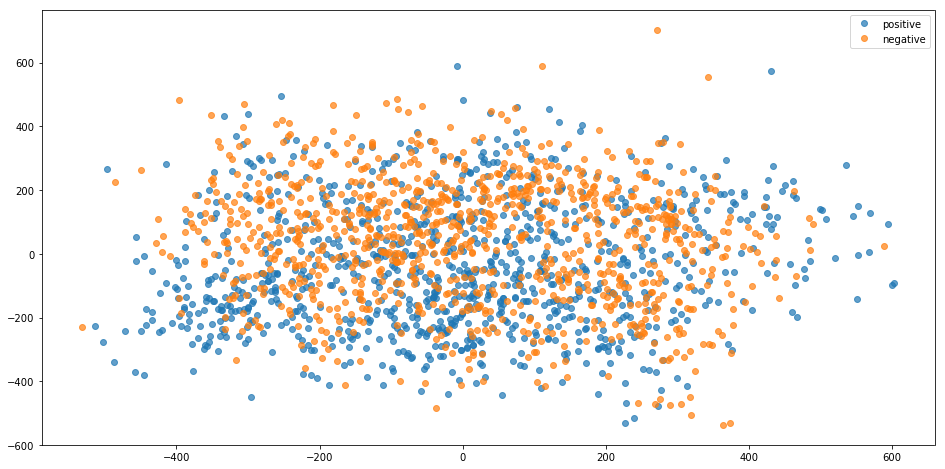

In [141]:
plt.figure(figsize=(16, 8))
plt.plot(madelon_pca[(madelon_labels.values==1)[:, 0], 0], madelon_pca[(madelon_labels.values==1)[:, 0], 1], 'o', alpha=0.7, label='positive')
plt.plot(madelon_pca[(madelon_labels.values==-1)[:, 0], 0], madelon_pca[(madelon_labels.values==-1)[:, 0], 1], 'o', alpha=0.7, label='negative')
plt.legend();

PCA seems somewhere in-between MDS and Isomap.

7 - Using a machine learning algorithm of your choice, fit a model to the data after performing feature reduction using Isomap, LLE, and PCA.  Report test and training accuracies and comment on your results.

In [139]:
# in solution he uses 10 components and uses random forest
# using linear regression
lr = LogisticRegression()
# looping through reduction algos
for reduction, name in zip([Isomap(), LocallyLinearEmbedding(), PCA()], ['Isomap', 'LLE', 'PCA']):
    print(name)
    # select the reduction and set params (using 50 components)
    mod = reduction
    mod.set_params(n_components=50)
    Xtrain_mod = mod.fit_transform(Xtrain)
    Xtest_mod = mod.transform(Xtest)
    # fit and score linear regression
    lr.fit(Xtrain_mod, ytrain.values.ravel())
    print('Training accuracy: {:.5f}'.format(lr.score(Xtrain_mod, ytrain)))
    print('Test accuracy: {:.5f}'.format(lr.score(Xtest_mod, ytest)))
    print('----------------------------------------------------------')

Isomap
Training accuracy: 0.65312
Test accuracy: 0.65250
----------------------------------------------------------
LLE
Training accuracy: 0.69437
Test accuracy: 0.69250
----------------------------------------------------------
PCA
Training accuracy: 0.60625
Test accuracy: 0.66250
----------------------------------------------------------


LLE gives the best results, while Isomap and PCA performances are quite similar.